Part 0:

In [1]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
from scipy.stats import poisson
import matplotlib.patches as mpatches
from functools import partial
import pickle
import os
import demixing as dm

nneuron = 61
min_angle = -90
max_angle = 90
sprefs = np.linspace(min_angle, max_angle, nneuron)
eps = np.finfo(np.float64).eps
sigtc_sq = float(10**2)

In [ ]:
posts = {}
testsets = {}
for s_i in range(91):
    file_name = 'output_post/post_' + str(s_i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        p, r, c, delta_s = pickle.load(pkl_file)
        posts[c, delta_s] = p
        testsets[c, delta_s] = r

In [ ]:
s1 = -30
ndata = 900
num_deltas = 30
c = 2
post_stats = {'mean_s1': np.zeros(num_deltas), 
                'mean_s2': np.zeros(num_deltas), 
                'bias_s1': np.zeros(num_deltas), 
                'bias_s2': np.zeros(num_deltas), 
                'var_s1': np.zeros(num_deltas), 
                'var_s2': np.zeros(num_deltas), 
                'cov': np.zeros(num_deltas), 
                'corr': np.zeros(num_deltas),
                'mse': np.zeros(num_deltas),
                }
for delta_s in range(num_deltas):
    post_means = np.array((posts[c, delta_s]['mean_s1'], posts[c, delta_s]['mean_s2']))
    stats = dm.get_statistics(s1, s1 + delta_s, post_means)
    post_stats['mean_s1'][delta_s] = stats['mean_s1']
    post_stats['mean_s2'][delta_s] = stats['mean_s2']
    post_stats['bias_s1'][delta_s] = stats['bias_s1']
    post_stats['bias_s2'][delta_s] = stats['bias_s2']
    post_stats['var_s1'][delta_s] = stats['var_s1']
    post_stats['var_s2'][delta_s] = stats['var_s2']
    post_stats['cov'][delta_s] = stats['cov']
    post_stats['corr'][delta_s] = stats['corr']
    post_stats['mse'][delta_s] = stats['mse']

In [ ]:
%matplotlib inline
f, ax = plt.subplots(2, 3, sharex='col', sharey='row')
s = range(0, 30)
for i in range(len(c_arr)):
    neg_sd = np.mean(nn_stats['bias_s2'][i], axis=0) - np.std(nn_stats['bias_s2'][i], axis=0)
    pos_sd = np.mean(nn_stats['bias_s2'][i], axis=0) + np.std(nn_stats['bias_s2'][i], axis=0)
    ax[0, i].plot(post_stats['bias_s2'][i], c='k', linewidth=2, label="Posterior mean")
    ax[0, i].plot(np.mean(nn_stats['bias_s2'][i], axis=0), c='m', label="Neural Net")
    ax[0, i].set_title(r'$C_1 = C_2 = $' + str(c_arr[i]), fontsize=20) #Change
    ax[0, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[0, i].set_ylim(-5, 10)
ax[0, 0].set_ylabel('Bias' ,fontsize=30)
ax[0, 2].legend(loc='upper right')
for i in range(len(c_arr)):
    neg_sd = np.mean(nn_stats['var_s2'][i], axis=0) - np.std(nn_stats['bias_s2'][i], axis=0)
    pos_sd = np.mean(nn_stats['var_s2'][i], axis=0) + np.std(nn_stats['bias_s2'][i], axis=0)
    ax[1, i].plot(post_stats['var_s2'][i], c='k', linewidth=2, label="Posterior mean")
    ax[1, i].plot(np.mean(nn_stats['var_s2'][i], axis=0), c='m', label="Neural Net")
    #ax[1, i].set_title("Contrast = " + str(c_arr[i]))
    ax[1, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
ax[1, 1].set_xlabel(r'$\Delta s$',fontsize=30)
ax[1, 0].set_ylabel('Variance' ,fontsize=30)
f.set_size_inches(15,15)
plt.tight_layout()

Just for presentation:

In [18]:
r20, s, c = dm.generate_testset(1, stim_0=-20, stim_1=20, con_0=4, con_1=0, r_max=1)
rm20, s, c = dm.generate_testset(1, stim_0=-20, stim_1=20, con_0=0, con_1=4, r_max=1)

(-0.3, 11)

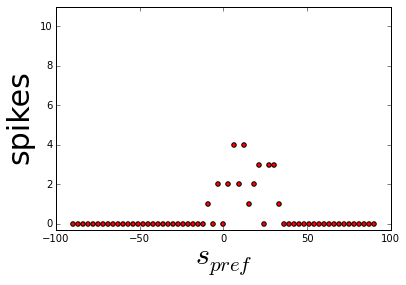

In [3]:
%matplotlib inline
plt.scatter(np.linspace(min_angle, max_angle, nneuron), r20[0], c='r')
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])

(-0.3, 11)

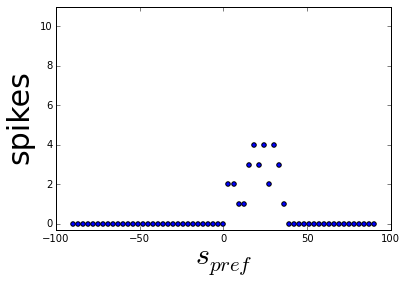

In [4]:
plt.scatter(np.linspace(min_angle, max_angle, nneuron), rm20[0])
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(np.linspace(min_angle, max_angle, nneuron), rm20[0] + r20[0], c='m')
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])
plt.arrow(-20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')
plt.arrow(20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')
plt.arrow(-19.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')
plt.arrow(22.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')
plt.arrow(-21, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')
plt.arrow(23.5, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')

Posterior plot:

In [7]:
post_func = dm.posterior_setup(discrete_c = [[4], [4]], num_s=121, r_max=1)

In [19]:
mean1, mean2, var1, var2, (s1_grid, s2_grid, grid) = post_func(rm20[0] + r20[0], ret_grid=True)

In [20]:
post_grid = np.zeros((121, 121))
for i in range(len(s1_grid)):
    post_grid[int(s1_grid[i])+60, int(s2_grid[i])+60] = grid[i]

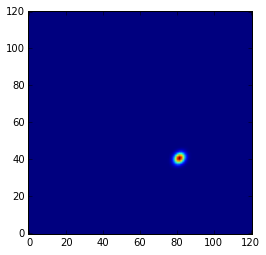

In [22]:
plt.imshow(post_grid, origin='lower')